# arXiv heatmap
### Visualizing the data

##### Starting point
- the dataset of cross-listings `data/arxiv-snapshots.parquet`
- the dataset of daily totals `data/arxiv-totals.parquet`

##### Goal
- creating a day-by-day graph of cross-listings
- visualizing the graph of cross-listings (with an animation?) and the totals in time (we need to do some smoothing)

## The code

In [1]:
import pandas as pd

We start by re-creating the list of categories (`arxiv_categories`) and the list of edges keys (`graph_edges_keys`).

In [ ]:
from itertools import combinations_with_replacement as cwr
import json

with open("../../data/arxiv-categories.json", "r") as f:
    arxiv_categories_descriptions = json.load(f)

arxiv_categories = sorted(
    [cat["tag"] for cat in arxiv_categories_descriptions]
    + ["q-bio", "cond-mat", "astro-ph"]
)

arxiv_categories_combinations = cwr(arxiv_categories, 2)

# use sorted to make sure the tuples are in a consistent ordering
graph_edges_keys = [tuple(sorted(index)) for index in arxiv_categories_combinations]
graph_edges_index = pd.MultiIndex.from_tuples(graph_edges_keys)

We load the snapshots and the totals.

In [ ]:
arxiv_snapshots = pd.read_parquet("../../data/arxiv-snapshots.parquet")
arxiv_totals = pd.read_parquet("../../data/arxiv-totals.parquet")

### A few plots just to get a feeling

Here is a plot of the total cross-listings.

In [ ]:
snapshots_totals = (
    arxiv_snapshots.sum(axis=0)
    .reset_index()
    .pivot_table(index="level_0", columns="level_1", values=0)
    .transpose()
)

In [ ]:
import plotly.express as px
from plotly_utils import imshow_logscale

fig = imshow_logscale(
    snapshots_totals,
    text_auto=True,
    title="arXiv total cross-listings",
    labels=dict(x="Category 1", y="Category 2", color="Number of papers"),
    template="simple_white",
)
fig.update_traces(hoverongaps=False)
# fig.update_traces(hovertemplate="Category 1: %{x}<br>Category 2: %{y}<br>Count: %{z}<extra></extra>")
fig.show()

/home/roberto/anaconda3/envs/arxiv-heatmaps/lib/python3.13/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


We can also plot a rolling average of cross-listings, for instance `hep-th` and `math.AG`.

<Axes: xlabel='date'>

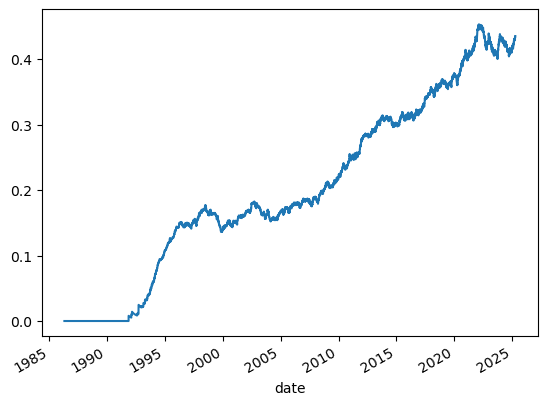

In [ ]:
arxiv_snapshots["hep-th", "math.AG"].rolling("1000d").mean().plot()

*Remark.* We should probably ignore whatever came before 1995, when the arXiv was still picking up.